# Bias in the determination of linear polarization.

**PURPOSE:** Illustrate the concept of bias and variance for quadratic estimators. Case of polarization intensity.

**Notation:** variables with index 0 correspond to true values (P0).

*@author: jarubinomartin*

October 23, 2025.

In [180]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
# WK estimator. Wardle & Kronberg (1974).
def p_wk(P, sigma):
    arg = P**2 - sigma**2
    Pwk = np.zeros(len(P))
    cut = arg>0
    Pwk[cut] = np.sqrt(arg[cut])
    #Pwk = np.where(arg>0, np.sqrt(arg), 0)
    return Pwk

# MAS estimator. Plaszczynski et al. (2014).
def p_mas(P, sigma):
    sigchi = sigma/(2*P) 
    Pmas   = P * ( 1 - 2*sigchi**2 * (1-np.exp(-P**2/sigma**2)))
    return Pmas

*FIRST example:* simulating a measurement in which the intrisic polarization is zero.

In [182]:
nsim = 100000
    
# CASE 1. Intrinsic polarization is zero Q0=U0=0
Q0    = 0.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.

# Simulating Measurements
n = nsim # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (classical method, biased):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 1. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK  = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 1. Intrinsic P0 =  0.0
> Mean value of Q =  0.0015073022567011676
> Standard deviation of Q   =  1.0036158335871788
> Mean value of U =  -0.0012544630405587464
> Standard deviation of U   =  0.9999613392793165
> Mean value of P =  1.2560409306232545
> Standard deviation of P   =  0.6553872501940005
Biased-corrected estimators:
> Mean value of PWK =  0.7635739207830593
> Mean value of Pmas=  0.9912385647786103
----------


The resulting P is biased. The two considered estimators partially correct for that bias.
The posterior (distribution of P values) is given by a Rice function (Vaillancourt 2006, PASP, 118, 1340):

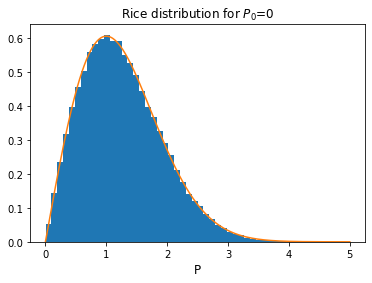

In [183]:
plt.hist(P,bins=50,density=True)
plt.xlabel(r"P", fontsize=12)
plt.title(r'Rice distribution for $P_0$=0')

# Rice function for P0=0. Vaillancourt (2006), PASP, 118, 1340
x = np.linspace(0, 5, 1000)
yRice = x/sigma**2 * np.exp(-0.5 * x**2 / sigma**2)
norma = np.trapz(yRice,x)
plt.plot(x,yRice/norma) 


*SECOND example:* simulating a measurement in which the intrisic polarization non zero, but small compared to the typical error.

In [184]:
Q0    = 1.0
U0    = 0.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# simulating Measurements
n     = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma

# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma

# Compute some statistics:
print("CASE 2. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))
print("----------")

CASE 2. Intrinsic P0 =  1.0
> Mean value of Q =  1.0017051257839555
> Standard deviation of Q   =  1.0006380367782024
> Mean value of U =  -0.0002025147864098694
> Standard deviation of U   =  1.000446082858865
> Mean value of P =  1.5503690169369004
> Standard deviation of P   =  0.7758466064314385
Biased-corrected estimators:
> Mean value of PWK =  1.1204058468508016
> Mean value of Pmas=  1.293705261513417
----------


*THIRD example:* simulating a measurement in which the intrisic polarization non zero, with an amplitude around 3-4 sigma levels (low signal to noise).

In [185]:
# CASE 3. Realistic case
Q0    = 3.0
U0    = 4.0
P0    = np.sqrt(Q0**2 + U0**2)
sigma = 1.0  # error in Q or U measuremnt.
    
# Measurements
n = nsim  # number of measurements.    
Q = Q0 + np.random.randn(n)*sigma
U = U0 + np.random.randn(n)*sigma
    
# Measured value of P (clasical method):
P = np.sqrt(Q**2 + U**2)
errP = sigma # quadratic.

# Compute some statistics:
print("CASE 3. Intrinsic P0 = ",P0)
print("> Mean value of Q = ",np.mean(Q))
print("> Standard deviation of Q   = ",np.std(Q))
print("> Mean value of U = ",np.mean(U))
print("> Standard deviation of U   = ",np.std(U))
    
print("> Mean value of P = ",np.mean(P))
print("> Standard deviation of P   = ",np.std(P))

print('Biased-corrected estimators:')
PWK = p_wk(P,sigma)
print("> Mean value of PWK = ",np.mean(PWK))
Pmas = p_mas(P,sigma)
print("> Mean value of Pmas= ",np.mean(Pmas))

CASE 3. Intrinsic P0 =  5.0
> Mean value of Q =  2.999910766382121
> Standard deviation of Q   =  0.9977611991497132
> Mean value of U =  4.001141185524728
> Standard deviation of U   =  0.9985328078069333
> Mean value of P =  5.101672155446055
> Standard deviation of P   =  0.9869811497184073
Biased-corrected estimators:
> Mean value of PWK =  4.998210187693393
> Mean value of Pmas=  4.999519676918806


In this case, the bias is well corrected.